# Imports

In [7]:
import pandas as pd

# Load Work Orders

In [37]:
df = pd.read_excel('Halo+4+Hostlers+Data+Analysis+V2.5.xlsx',sheet_name='QS Cleaned data',parse_dates=['wo_completeddatetime'])
df['completed_dt'] = pd.to_datetime(
    df['wo_completeddatetime'],
    format="%b %d, %Y %I:%M%p",
    errors="coerce"
)


In [38]:
random_inspections = df[df['position']=='Inspect all tires']

In [39]:
mean_gaps = (
  random_inspections
    .sort_values(['aap_vehicleid','completed_dt'])
    .groupby('aap_vehicleid')
    .completed_dt
    .apply(lambda ts: ts.diff().mean())
    .reset_index(name='avg_time_between')
)


In [40]:
mean_gaps['days_between_random_inspections'] = mean_gaps['avg_time_between']/pd.Timedelta(days=1)

In [41]:
mean_gaps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1527 entries, 0 to 1526
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype          
---  ------                           --------------  -----          
 0   aap_vehicleid                    1527 non-null   object         
 1   avg_time_between                 679 non-null    timedelta64[ns]
 2   days_between_random_inspections  679 non-null    float64        
dtypes: float64(1), object(1), timedelta64[ns](1)
memory usage: 35.9+ KB


In [42]:
mean_gaps['days_between_random_inspections'].describe()

count    679.000000
mean      47.878940
std       36.420168
min        0.040278
25%       21.432778
50%       39.865625
75%       63.760069
max      176.674306
Name: days_between_random_inspections, dtype: float64

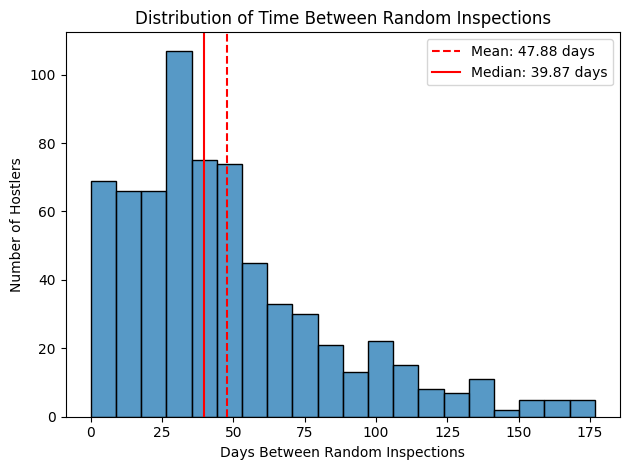

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

data = mean_gaps['days_between_random_inspections'].dropna()
mean_val, median_val = data.mean(), data.median()

plt.figure()
sns.histplot(data, bins=20, kde=False)
plt.axvline(mean_val,   linestyle='--', color='red', label=f'Mean: {mean_val:.2f} days')
plt.axvline(median_val, linestyle='-',color='red',   label=f'Median: {median_val:.2f} days')
plt.xlabel('Days Between Random Inspections')
plt.ylabel('Number of Hostlers')
plt.title('Distribution of Time Between Random Inspections')
plt.legend()
plt.tight_layout()
plt.show()
